In [28]:
from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [29]:
df = pd.read_csv("../data.csv")
df.head()

,city,company_name,description,position,profession
0,Freiburg im Breisgau,SmallCases GmbH Softwareberatung,"Wir, die Smallcases Software GmbH, sind seit u...",Softwareentwickler (m/w/d) Python,Softwareentwickler/in
1,Stuttgart,BCM Solutions GmbH,Was dich erwartet:- Deinen Tech-Stack erweiter...,Senior Python Entwickler (w/m/d),Softwareentwickler/in
2,Stuttgart,BCM Solutions GmbH,Was dich erwartet:- Deinen Tech-Stack erweiter...,Intermediate Python Entwickler (w/m/d),Softwareentwickler/in
3,"Nürnberg, Mittelfranken",Brunel GmbH NL Nürnberg,Ihre AufgabenMöchten Sie die nächste Stufe in ...,Python Softwareentwickler (m/w/d),Softwareentwickler/in
4,München,ARRK Engineering GmbH,Softwareentwickler (m/w/d) Python im Bereich A...,Softwareentwickler (m/w/d) Python Automatisier...,Softwareentwickler/in


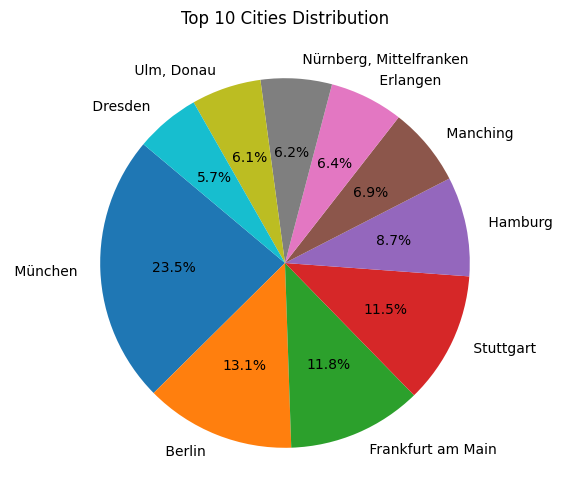

In [3]:
city_counts = df["city"].value_counts().head(10)

plt.figure(figsize=(6, 6))
plt.pie(city_counts, labels=city_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Top 10 Cities Distribution")
plt.show()

([<matplotlib.axis.XTick at 0x2198afb6e50>,
 [Text(0, 0, ' Deutsche Bahn AG '),
  Text(1, 0, ' Fraunhofer-Gesellschaft e.V. Zentrale München '),
  Text(2, 0, ' Siemens AG '),
  Text(3, 0, ' Mercedes-Benz Group AG '),
  Text(4, 0, ' Robert Bosch GmbH '),
  Text(5, 0, ' Orizon GmbH Aviation '),
  Text(6, 0, ' Deloitte GmbH '),
  Text(7, 0, ' Akkodis Germany Tech Experts GmbH '),
  Text(8, 0, ' BMW AG '),
  Text(9, 0, ' Brunel GmbH NL Bielefeld ')])

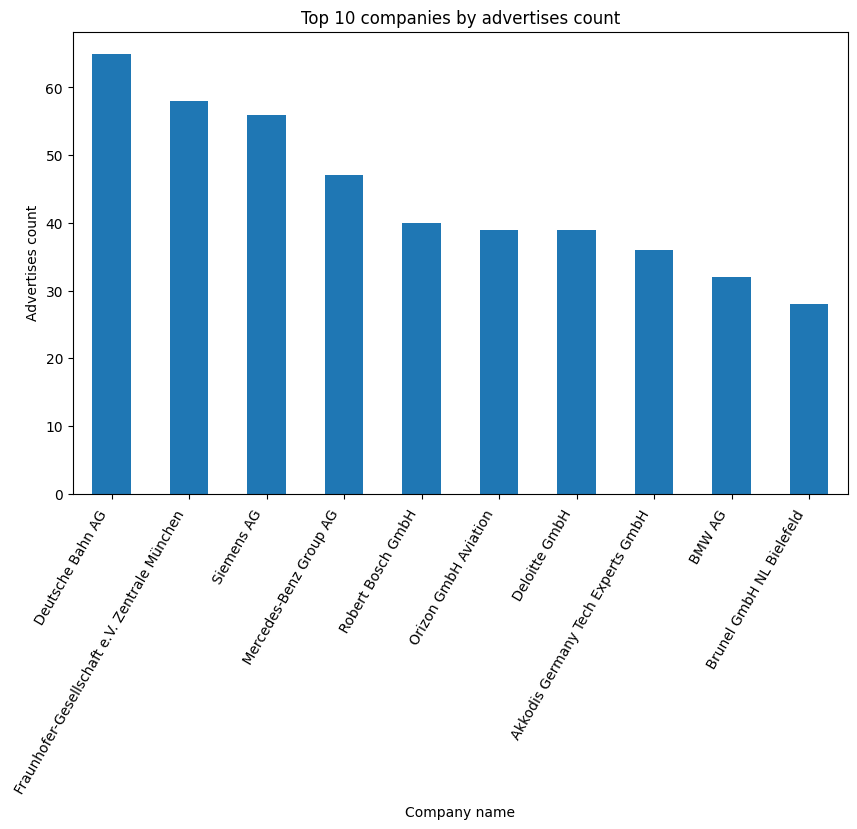

In [4]:
companies_count = df["company_name"].value_counts().head(10)

plt.figure(figsize=(10, 6))
companies_count.plot(kind="bar")
plt.xlabel("Company name")
plt.ylabel("Advertises count")
plt.title("Top 10 companies by advertises count")
plt.xticks(range(len(companies_count)), companies_count.index, rotation=60, ha="right")

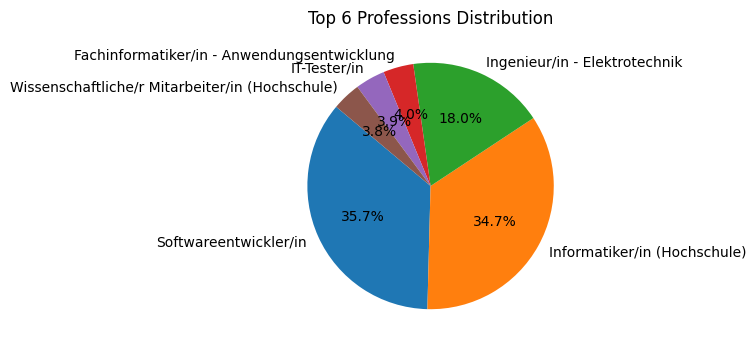

In [21]:
profession_counts = df["profession"].value_counts().head(6)

plt.figure(figsize=(6, 4))
plt.pie(
    profession_counts, labels=profession_counts.index, autopct="%1.1f%%", startangle=140
)
plt.title("Top 6 Professions Distribution")
plt.show()

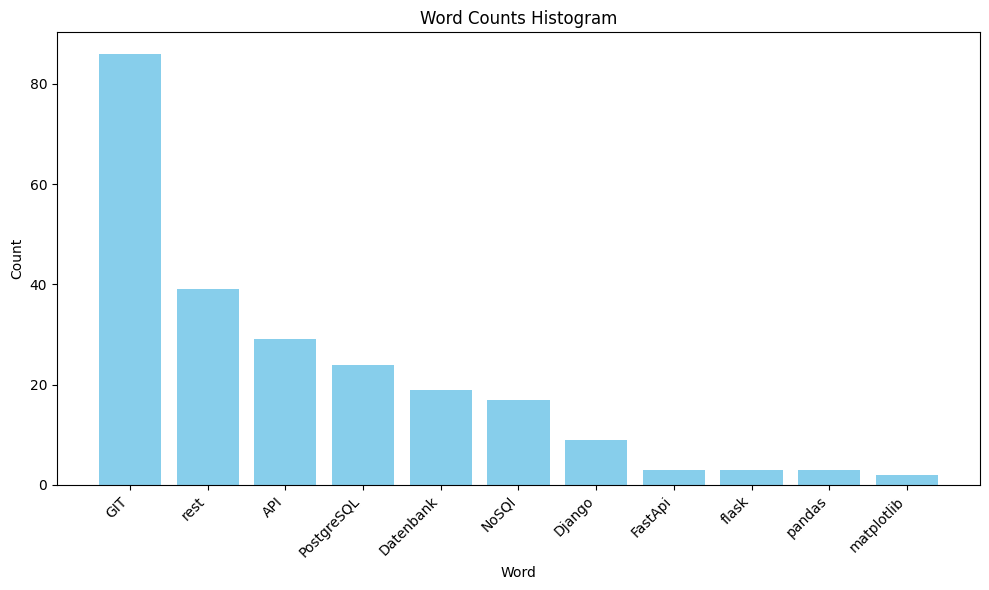

In [34]:
target_words = [
    "Django",
    "API",
    "GIT",
    "FastApi",
    "flask",
    "rest",
    "pandas",
    "matplotlib",
    "PostgreSQL",
    "NoSQl",
    "Datenbanken",
    "Docker",
]
df = df.dropna(subset=["description"])
word_counts = Counter(" ".join(df["description"]).lower().split())
target_word_counts = {word: word_counts.get(word.lower(), 0) for word in target_words}
word_counts_df = pd.DataFrame(
    list(target_word_counts.items()), columns=["word", "count"]
).sort_values(by="count", ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(word_counts_df["word"], word_counts_df["count"], color="skyblue")
plt.xlabel("Word")
plt.ylabel("Count")
plt.title("Word Counts Histogram")
plt.xticks(rotation=45, ha="right")  # Adjust rotation for better readability
plt.tight_layout()  # Ensure labels are not cut off
plt.show()